In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

### Data Collection

In [2]:
data=pd.read_csv(r"C:\Users\iat\Downloads\advertising\Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [4]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

### Data Cleaning

In [7]:
data.rename(columns={'Unnamed: 0':'SNO'})
#col_names=['SNO','TV','Radio','Newspaper','Sales']
#data.columns=col_names
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


### Data Visualization

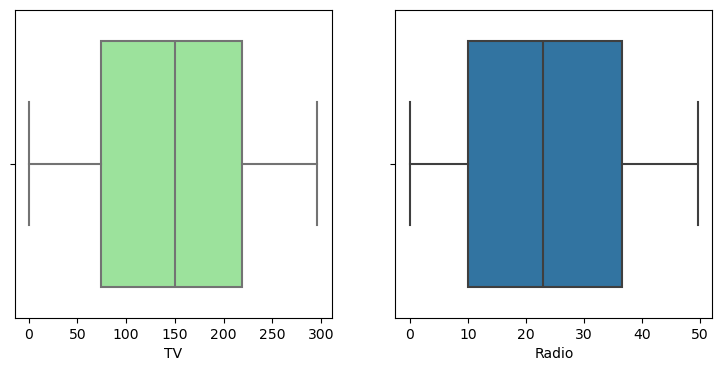

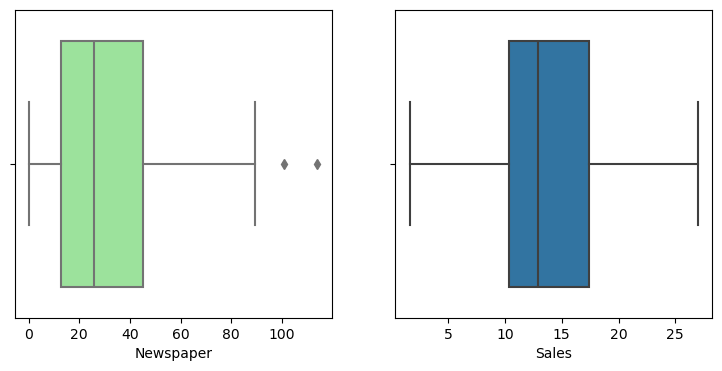

In [8]:
columns=['TV','Radio','Newspaper','Sales']
i=0
while i<4:
    fig=plt.figure(figsize=[9,4])
    plt.subplot(1,2,1)
    sns.boxplot(x=columns[i],data=data,color="lightgreen")
    i+=1
    plt.subplot(1,2,2)
    sns.boxplot(x=columns[i],data=data)
    i+=1

    plt.show()

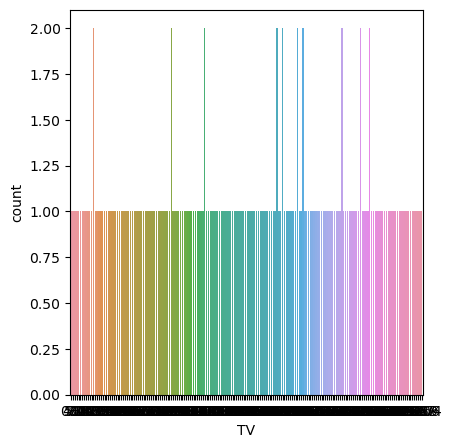

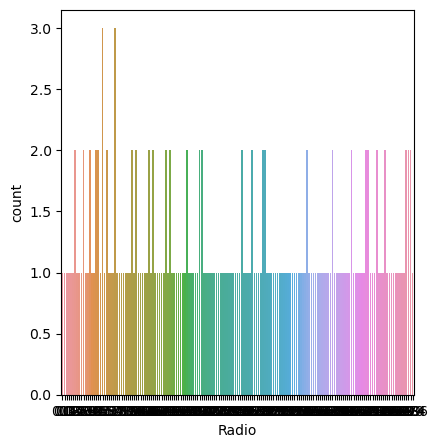

In [9]:
columns=['TV','Radio']
i=0
while i<2:
    fig=plt.figure(figsize=[10,5])
    
    plt.subplot(1,2,1)
    sns.countplot(x=columns[i],data=data)
    i+=1
    
    
    plt.show()

In [10]:
x=data.drop('Sales',axis=1)
y=data['Sales']
print(x.head())
print(y.head())

   Unnamed: 0     TV  Radio  Newspaper
0           1  230.1   37.8       69.2
1           2   44.5   39.3       45.1
2           3   17.2   45.9       69.3
3           4  151.5   41.3       58.5
4           5  180.8   10.8       58.4
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64


In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("x_train :", x_train.shape)
print("x_test :", x_test.shape)
print("y_train :", y_train.shape)
print("y_test :", y_test.shape)

x_train : (160, 4)
x_test : (40, 4)
y_train : (160,)
y_test : (40,)


In [12]:
from sklearn.linear_model import LinearRegression 
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([10.24664397,  7.3067958 ,  7.01313011, 24.0629912 , 11.84538583,
        6.3623126 , 12.97367539, 15.01392577, 10.95137181, 16.2302401 ,
       22.94764396,  9.07892877, 10.29830431, 15.372556  , 11.63358138,
       12.38729183, 18.91996453, 10.72601207, 16.03372676, 17.36589369,
       23.85225051,  9.51048184, 15.25366204, 12.2528663 ,  5.81346738,
       15.19998588, 12.12398331, 20.74762723, 13.36651757,  9.16548788,
       13.0430809 , 21.47977498, 18.01828076, 21.14170908,  6.74096317,
        5.9527019 ,  7.82515133, 13.21661502, 14.72150697,  6.18172688])

In [13]:
print("Coefficients:",model.coef_)
print("Intercept:",model.intercept_)

Coefficients: [-0.00222187  0.0445384   0.1962548  -0.00319076]
Intercept: 3.2419693672141605


### calculate MSE

In [14]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,y_pred)
mse

4.5164878222194265

In [15]:
error=y_test-y_pred
error

18     1.053356
170    1.093204
107    1.686870
98     1.337009
177   -0.145386
182    2.337687
5     -5.773675
146   -1.813926
12    -1.751372
152    0.369760
61     1.252356
125    1.521071
180    0.201696
154    0.227444
80     0.166419
7      0.812708
33    -1.519965
130   -9.126012
37    -1.333727
74    -0.365894
183    2.347749
145    0.789518
45    -0.353662
159    0.647134
60     2.286533
123    0.000014
179    0.476017
185    1.852373
122   -1.766518
44    -0.665488
16    -0.543081
55     2.220225
150   -1.918281
111    0.658291
22    -1.140963
189    0.747298
129    1.874849
4     -0.316615
83    -1.121507
106    1.018273
Name: Sales, dtype: float64

In [16]:
accurracy= metrics.r2_score(y_test,y_pred)
print("Accuracy:",accurracy)

Accuracy: 0.8564802143279248
